**Demographics of City of El Monte**

This notebook covers the demographics for City of El Monte at the census block group level. 

**Import Libraries & Data**

In [9]:
import pandas as pd
import geopandas as gdp
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
race = gdp.read_file('acs2019_5yr.geojson')

**Data Exploration**

In [11]:
#how many rows and columns are in the data
race.shape

(79, 45)

In [12]:
race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",857.0,177.0,640.0,188.0,206.0,90.0,25.0,40.0,...,12.0,33.0,42.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",1134.0,280.0,994.0,220.0,444.0,170.0,23.0,36.0,...,12.0,69.0,63.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",881.0,387.0,340.0,131.0,75.0,58.0,8.0,11.0,...,12.0,280.0,265.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",1415.0,252.0,1174.0,230.0,268.0,136.0,0.0,12.0,...,12.0,31.0,33.0,34.0,38.0,17.0,25.0,17.0,29.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",1369.0,261.0,1242.0,254.0,275.0,150.0,0.0,12.0,...,12.0,10.0,16.0,16.0,24.0,16.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


In [13]:
race.tail()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
74,15000US060374340012,"Block Group 2, Los Angeles, CA",2412.0,373.0,296.0,132.0,57.0,58.0,6.0,10.0,...,12.0,791.0,288.0,56.0,63.0,32.0,49.0,24.0,37.0,"MULTIPOLYGON (((-118.01975 34.04506, -118.0195..."
75,15000US060374340031,"Block Group 1, Los Angeles, CA",1485.0,509.0,163.0,96.0,71.0,73.0,0.0,12.0,...,12.0,581.0,452.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.02985 34.04569, -118.0294..."
76,15000US060374340032,"Block Group 2, Los Angeles, CA",1657.0,440.0,289.0,170.0,42.0,32.0,5.0,8.0,...,12.0,697.0,296.0,47.0,68.0,47.0,68.0,0.0,12.0,"MULTIPOLYGON (((-118.02835 34.03929, -118.0278..."
77,15000US060374340033,"Block Group 3, Los Angeles, CA",1575.0,485.0,399.0,127.0,30.0,24.0,0.0,12.0,...,12.0,329.0,203.0,20.0,21.0,7.0,10.0,13.0,19.0,"MULTIPOLYGON (((-118.02365 34.05082, -118.0227..."
78,16000US0622230,"El Monte, CA",115517.0,90.0,39601.0,1487.0,4183.0,528.0,514.0,207.0,...,57.0,30906.0,2216.0,3261.0,826.0,2852.0,805.0,409.0,203.0,"MULTIPOLYGON (((-118.07293 34.07227, -118.0728..."


In [14]:
race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             79 non-null     object  
 1   name              79 non-null     object  
 2   B03002001         79 non-null     float64 
 3   B03002001, Error  79 non-null     float64 
 4   B03002002         79 non-null     float64 
 5   B03002002, Error  79 non-null     float64 
 6   B03002003         79 non-null     float64 
 7   B03002003, Error  79 non-null     float64 
 8   B03002004         79 non-null     float64 
 9   B03002004, Error  79 non-null     float64 
 10  B03002005         79 non-null     float64 
 11  B03002005, Error  79 non-null     float64 
 12  B03002006         79 non-null     float64 
 13  B03002006, Error  79 non-null     float64 
 14  B03002007         79 non-null     float64 
 15  B03002007, Error  79 non-null     float64 
 16  B03002008         79

<AxesSubplot:>

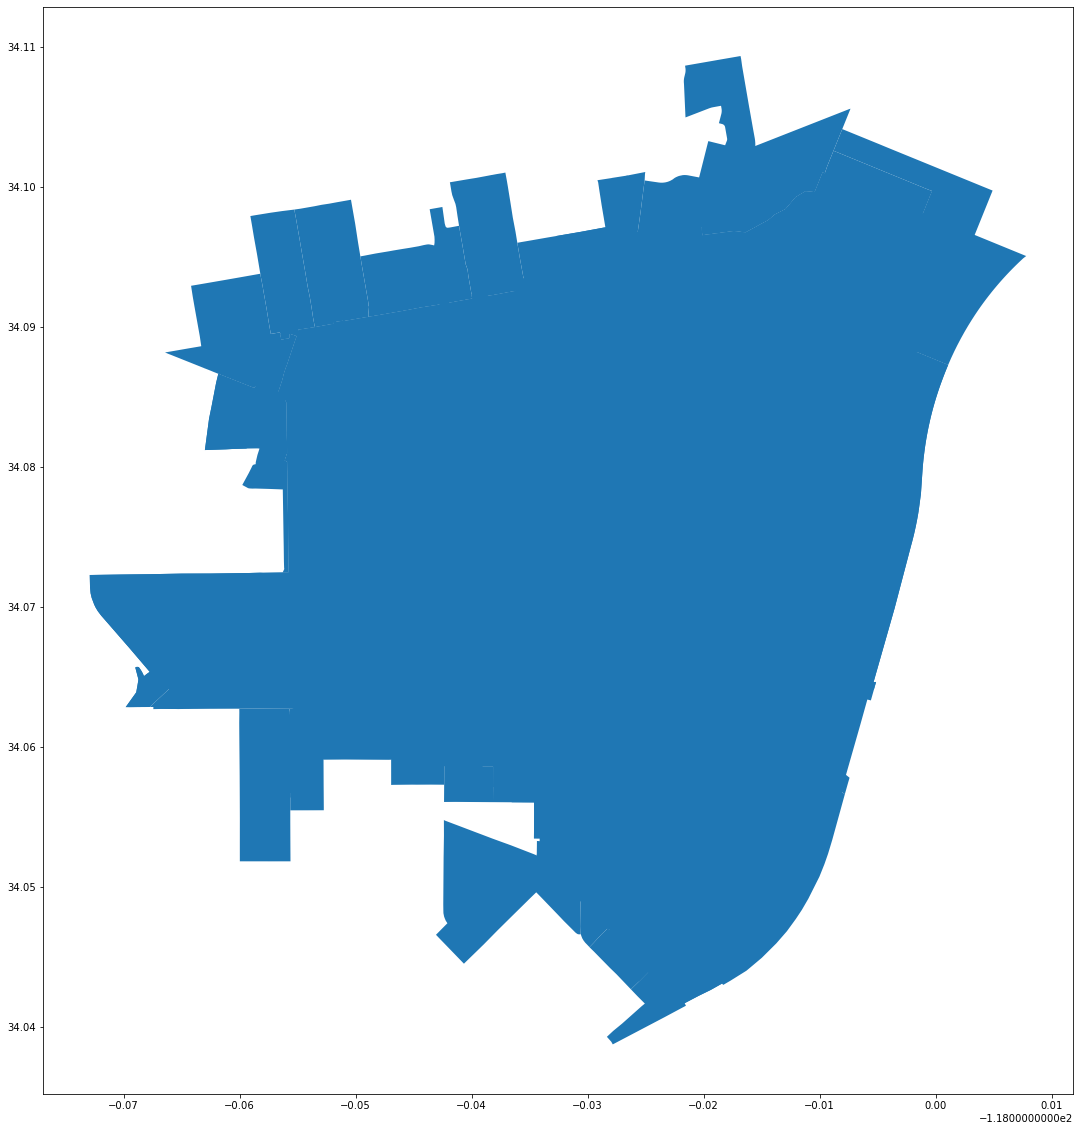

In [15]:
race.plot(figsize=(20,20))

In [11]:
#In order to undestand the relationship between race and space, I analyze the GEOIDs in the file
race.geoid.head()

0    15000US060374315011
1    15000US060374315022
2    15000US060374315023
3    15000US060374321011
4    15000US060374321012
Name: geoid, dtype: object

In [16]:
# now I can begin trimming data so that I can analyze what I need
race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",857.0,177.0,640.0,188.0,206.0,90.0,25.0,40.0,...,12.0,33.0,42.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",1134.0,280.0,994.0,220.0,444.0,170.0,23.0,36.0,...,12.0,69.0,63.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",881.0,387.0,340.0,131.0,75.0,58.0,8.0,11.0,...,12.0,280.0,265.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",1415.0,252.0,1174.0,230.0,268.0,136.0,0.0,12.0,...,12.0,31.0,33.0,34.0,38.0,17.0,25.0,17.0,29.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",1369.0,261.0,1242.0,254.0,275.0,150.0,0.0,12.0,...,12.0,10.0,16.0,16.0,24.0,16.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


In [17]:
# Now I can begin dropping columns I don't need
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [18]:
# I want to capture data for Hispanic or Latino (ethnicity) and the races listed who did not idenify with that ethnicity.
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [19]:
# how does my data look now?
race = race[columns_to_keep]

In [20]:
race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",857.0,640.0,206.0,25.0,0.0,374.0,0.0,0.0,35.0,217.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",1134.0,994.0,444.0,23.0,0.0,513.0,0.0,0.0,14.0,140.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",881.0,340.0,75.0,8.0,4.0,253.0,0.0,0.0,0.0,541.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",1415.0,1174.0,268.0,0.0,11.0,863.0,0.0,0.0,32.0,241.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",1369.0,1242.0,275.0,0.0,30.0,937.0,0.0,0.0,0.0,127.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


In [21]:
# Now I can see only the variables I wanted to keep are displaying. But the titles can be confusing, so I will rename them.
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [22]:
race.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [23]:
race.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,15000US060374315011,"Block Group 1, Los Angeles, CA",857.0,640.0,206.0,25.0,0.0,374.0,0.0,0.0,35.0,217.0,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357..."
1,15000US060374315022,"Block Group 2, Los Angeles, CA",1134.0,994.0,444.0,23.0,0.0,513.0,0.0,0.0,14.0,140.0,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258..."
2,15000US060374315023,"Block Group 3, Los Angeles, CA",881.0,340.0,75.0,8.0,4.0,253.0,0.0,0.0,0.0,541.0,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279..."
3,15000US060374321011,"Block Group 1, Los Angeles, CA",1415.0,1174.0,268.0,0.0,11.0,863.0,0.0,0.0,32.0,241.0,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411..."
4,15000US060374321012,"Block Group 2, Los Angeles, CA",1369.0,1242.0,275.0,0.0,30.0,937.0,0.0,0.0,0.0,127.0,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492..."


**Sorting**

In [29]:
# I can now begin to sort my data so I can understand demographic changes by geography
race_sorted = race.sort_values(by='Total',ascending = False)

In [25]:
race_sorted[['geoid','Total']].head(10)

,geoid,Total
78,16000US0622230,115517.0
13,15000US060374324021,3395.0
27,15000US060374327001,3177.0
67,15000US060374339011,3150.0
38,15000US060374331021,3119.0
46,15000US060374333042,3080.0
47,15000US060374333051,2981.0
43,15000US060374332004,2958.0
58,15000US060374334022,2762.0
21,15000US060374326012,2659.0


In [27]:
# i need to drop row 78 which is for the entire City of El Monte
race=race.drop(78)

In [30]:
race_sorted[['geoid','Total']].head(10)

,geoid,Total
13,15000US060374324021,3395.0
27,15000US060374327001,3177.0
67,15000US060374339011,3150.0
38,15000US060374331021,3119.0
46,15000US060374333042,3080.0
47,15000US060374333051,2981.0
43,15000US060374332004,2958.0
58,15000US060374334022,2762.0
21,15000US060374326012,2659.0
17,15000US060374325002,2565.0


In [31]:
#I want to create a column with percent totals
race['Percent Non Hispanic'] = race['Non Hispanic']/race['Total']*100
race['Percent Non Hispanic White'] = race['Non Hispanic White']/race['Total']*100
race['Percent Non Hispanic Black'] = race['Non Hispanic Black']/race['Total']*100
race['Percent Non Hispanic American Indian and Alaska Native'] = race['Non Hispanic American Indian and Alaska Native']/race['Total']*100
race['Percent Non Hispanic Asian'] = race['Non Hispanic Asian']/race['Total']*100
race['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = race['Non Hispanic Native Hawaiian and Other Pacific Islander']/race['Total']*100
race['Percent Non Hispanic Some other race'] = race['Non Hispanic Some other race']/race['Total']*100
race['Percent Non Hispanic Two or more races'] = race['Non Hispanic Two or more races']/race['Total']*100
race['Percent Hispanic'] = race['Hispanic']/race['Total']*100

In [32]:
race.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic
0,15000US060374315011,"Block Group 1, Los Angeles, CA",857.0,640.0,206.0,25.0,0.0,374.0,0.0,0.0,...,"MULTIPOLYGON (((-118.03607 34.09599, -118.0357...",74.679113,24.037340,2.917153,0.000000,43.640607,0.0,0.0,4.084014,25.320887
1,15000US060374315022,"Block Group 2, Los Angeles, CA",1134.0,994.0,444.0,23.0,0.0,513.0,0.0,0.0,...,"MULTIPOLYGON (((-118.02589 34.09595, -118.0258...",87.654321,39.153439,2.028219,0.000000,45.238095,0.0,0.0,1.234568,12.345679
2,15000US060374315023,"Block Group 3, Los Angeles, CA",881.0,340.0,75.0,8.0,4.0,253.0,0.0,0.0,...,"MULTIPOLYGON (((-118.02916 34.10046, -118.0279...",38.592509,8.513053,0.908059,0.454030,28.717367,0.0,0.0,0.000000,61.407491
3,15000US060374321011,"Block Group 1, Los Angeles, CA",1415.0,1174.0,268.0,0.0,11.0,863.0,0.0,0.0,...,"MULTIPOLYGON (((-118.04188 34.10031, -118.0411...",82.968198,18.939929,0.000000,0.777385,60.989399,0.0,0.0,2.261484,17.031802
4,15000US060374321012,"Block Group 2, Los Angeles, CA",1369.0,1242.0,275.0,0.0,30.0,937.0,0.0,0.0,...,"MULTIPOLYGON (((-118.04960 34.09502, -118.0492...",90.723156,20.087655,0.000000,2.191381,68.444120,0.0,0.0,0.000000,9.276844


<AxesSubplot:>

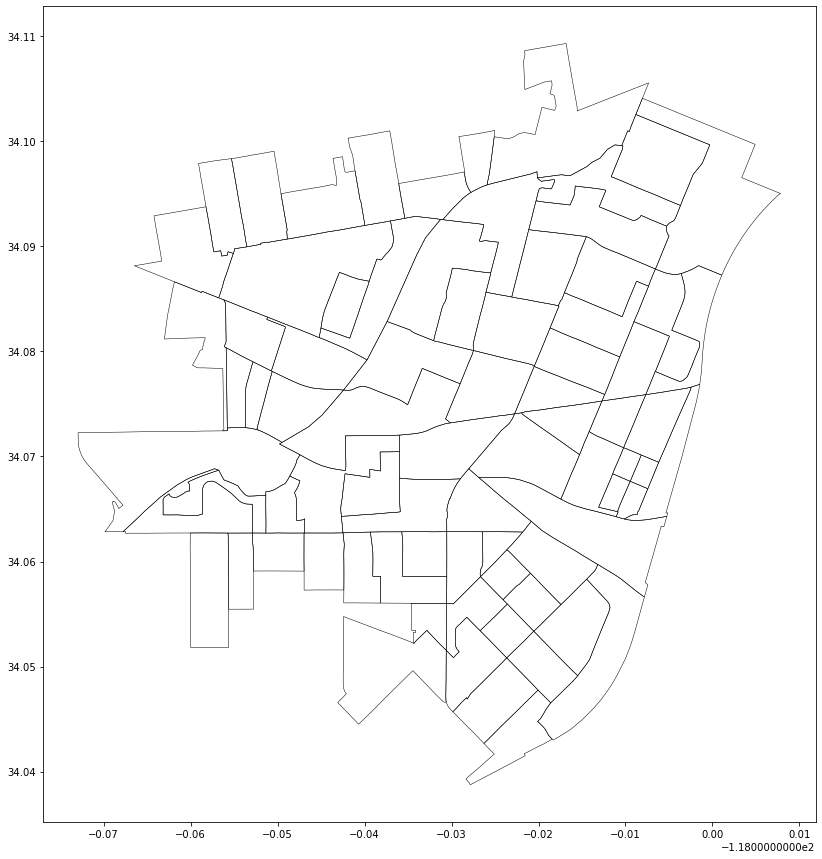

In [33]:
fig,ax = plt.subplots(figsize=(15,15))

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
race.boundary.plot(ax=ax,color='black',zorder=15,lw=0.5)

<AxesSubplot:>

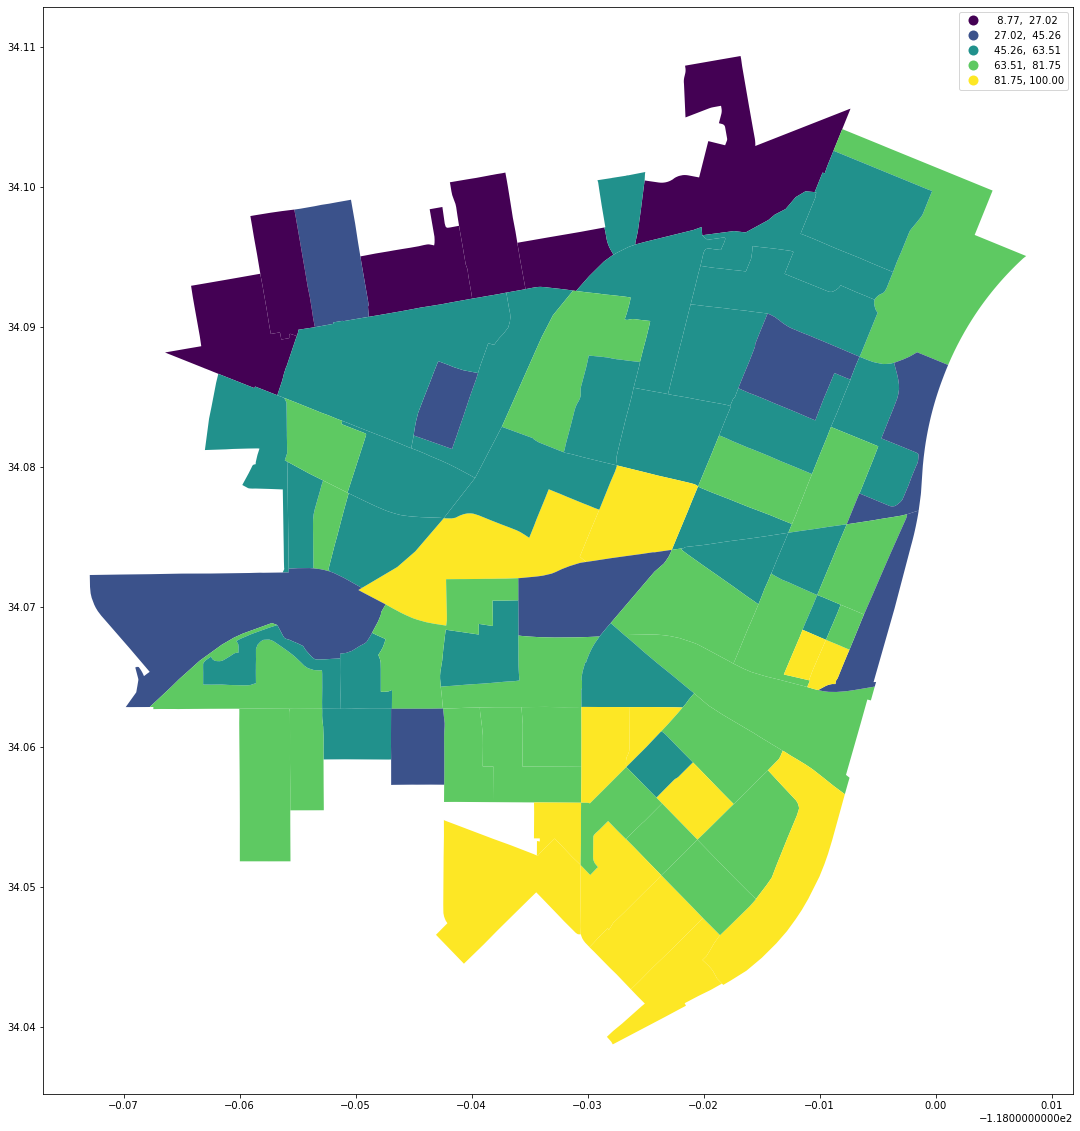

In [34]:
#now I want to map the percentage of Latinx populations since literature suggests there are high populations living in mobile homes.
race.plot(figsize=(20,20),
         column='Percent Hispanic',
         legend=True,
         scheme='equal_interval')

In [37]:
# I want to undestand the demographics of the areas with higher concentrations of mobile homes. 
# Where is there more non-white, Black, Indigenous, People of Color (BIPOC) concenrations? I will need to create a new column.

In [38]:
race['Percent Non white'] = race['Percent Non Hispanic Black'] + race['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + race['Percent Non Hispanic Asian'] + race['Percent Non Hispanic Some other race'] + race['Percent Non Hispanic Two or more races'] + race['Percent Hispanic'] + race['Percent Non Hispanic American Indian and Alaska Native']

In [39]:
race.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non white
0,15000US060374315011,"Block Group 1, Los Angeles, CA",857.0,640.0,206.0,25.0,0.0,374.0,0.0,0.0,...,74.679113,24.037340,2.917153,0.000000,43.640607,0.0,0.0,4.084014,25.320887,75.962660
1,15000US060374315022,"Block Group 2, Los Angeles, CA",1134.0,994.0,444.0,23.0,0.0,513.0,0.0,0.0,...,87.654321,39.153439,2.028219,0.000000,45.238095,0.0,0.0,1.234568,12.345679,60.846561
2,15000US060374315023,"Block Group 3, Los Angeles, CA",881.0,340.0,75.0,8.0,4.0,253.0,0.0,0.0,...,38.592509,8.513053,0.908059,0.454030,28.717367,0.0,0.0,0.000000,61.407491,91.486947
3,15000US060374321011,"Block Group 1, Los Angeles, CA",1415.0,1174.0,268.0,0.0,11.0,863.0,0.0,0.0,...,82.968198,18.939929,0.000000,0.777385,60.989399,0.0,0.0,2.261484,17.031802,81.060071
4,15000US060374321012,"Block Group 2, Los Angeles, CA",1369.0,1242.0,275.0,0.0,30.0,937.0,0.0,0.0,...,90.723156,20.087655,0.000000,2.191381,68.444120,0.0,0.0,0.000000,9.276844,79.912345


In [40]:
#I want to ensure then entegrity of my data
percent_random_tract = race.sample()
percent_random_tract

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non white
57,15000US060374334021,"Block Group 1, Los Angeles, CA",1951.0,437.0,49.0,12.0,0.0,275.0,21.0,0.0,...,22.39877,2.511533,0.615069,0.0,14.095336,1.076371,0.0,4.100461,77.60123,97.488467


In [41]:
percent_random_tract.iloc[0]['Percent Non white']

97.48846745258841

In [42]:
(percent_random_tract.iloc[0]['Percent Non Hispanic Black'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Asian'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Some other race'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Two or more races'] +
      percent_random_tract.iloc[0]['Percent Hispanic'] +
      percent_random_tract.iloc[0]['Percent Non Hispanic American Indian and Alaska Native'])

97.48846745258841

This shows me my columns are correct since both calculations are the same. Now I can plot this new column to get an idead of the BIPOC demographics in the County.

<AxesSubplot:>

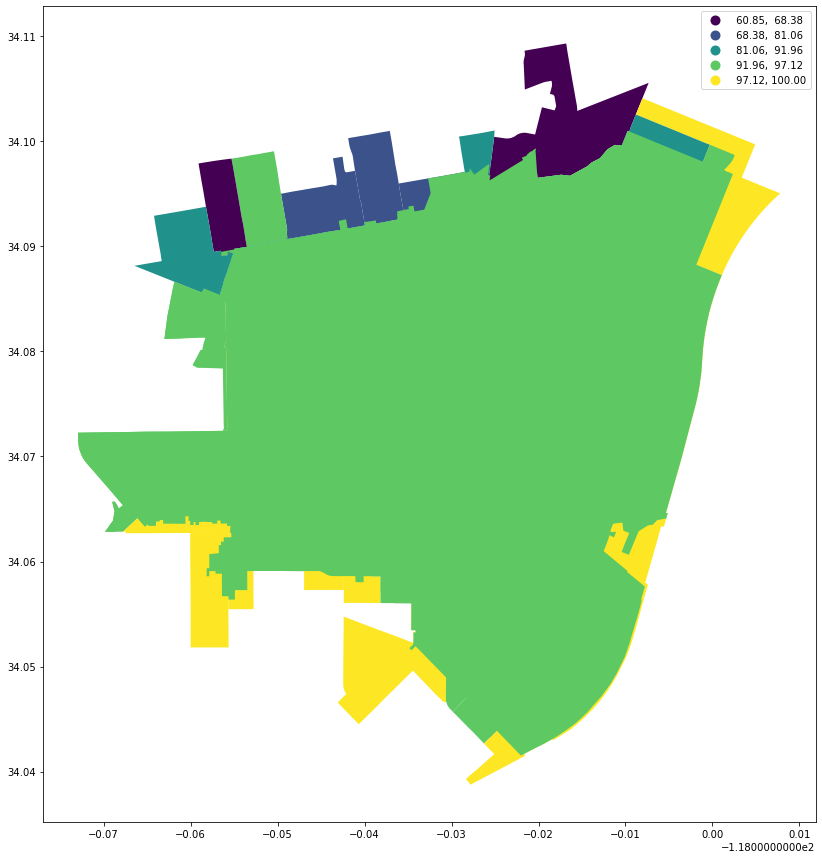

In [44]:
race.plot(figsize=(20,15),
                 column='Percent Non white',
                 legend=True, 
                 scheme='NaturalBreaks')

In [46]:
# Now I will see the the demographics side by side
race_web_mercator = race.to_crs(epsg=3857)

Text(0.5, 1.0, 'Percent Non Hispanic White')

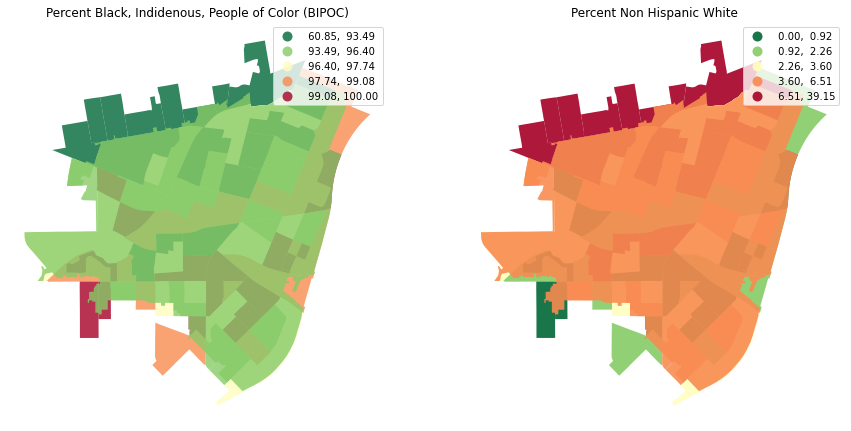

In [59]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
race.plot(column='Percent Non white', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.80, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Black, Indidenous, People of Color (BIPOC)")

# percent black map on the right
race.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.90, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

Text(0.5, 1.0, 'Percent Latinx')

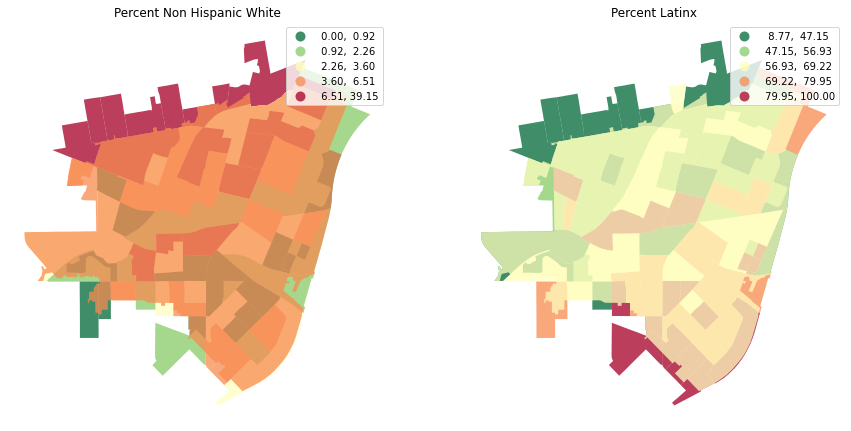

In [50]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent non hispanic white map on the left
race.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non Hispanic White")

# percent black map on the right
race.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Latinx")

**More Mapping**

In [51]:
# Let's see if we can map out ethnic clusters. Since I know that El monte has a high population of Latinx people, I want to understand how they look based on block groups.

race[race['Percent Hispanic'] > 90]

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non white
27,15000US060374327001,"Block Group 1, Los Angeles, CA",3177.0,293.0,46.0,0.0,0.0,247.0,0.0,0.0,...,9.222537,1.447907,0.000000,0.0,7.774630,0.0,0.0,0.0,90.777463,98.552093
51,15000US060374333063,"Block Group 3, Los Angeles, CA",358.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,100.000000,100.000000
53,15000US060374333072,"Block Group 2, Los Angeles, CA",736.0,36.0,10.0,0.0,0.0,26.0,0.0,0.0,...,4.891304,1.358696,0.000000,0.0,3.532609,0.0,0.0,0.0,95.108696,98.641304
60,15000US060374334032,"Block Group 2, Los Angeles, CA",1888.0,111.0,0.0,0.0,0.0,111.0,0.0,0.0,...,5.879237,0.000000,0.000000,0.0,5.879237,0.0,0.0,0.0,94.120763,100.000000
66,15000US060374338014,"Block Group 4, Los Angeles, CA",1742.0,132.0,0.0,11.0,0.0,121.0,0.0,0.0,...,7.577497,0.000000,0.631458,0.0,6.946039,0.0,0.0,0.0,92.422503,100.000000
68,15000US060374339012,"Block Group 2, Los Angeles, CA",1682.0,22.0,0.0,0.0,0.0,22.0,0.0,0.0,...,1.307967,0.000000,0.000000,0.0,1.307967,0.0,0.0,0.0,98.692033,100.000000
71,15000US060374339022,"Block Group 2, Los Angeles, CA",1491.0,144.0,59.0,0.0,0.0,85.0,0.0,0.0,...,9.657948,3.957076,0.000000,0.0,5.700872,0.0,0.0,0.0,90.342052,96.042924


<AxesSubplot:>

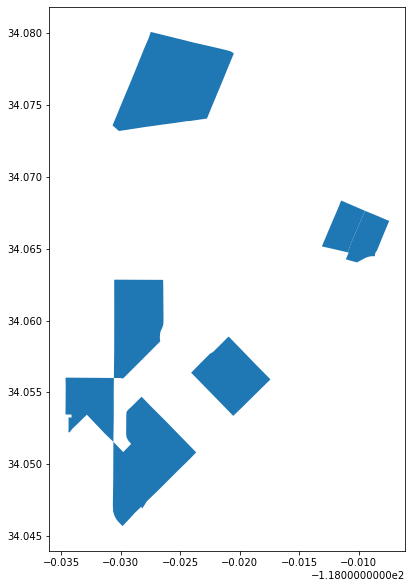

In [52]:
race[race['Percent Hispanic'] > 90].plot(figsize=(12,10))

In [53]:
# reproject to Web Mercator
race_web_mercator = race.to_crs(epsg=3857)

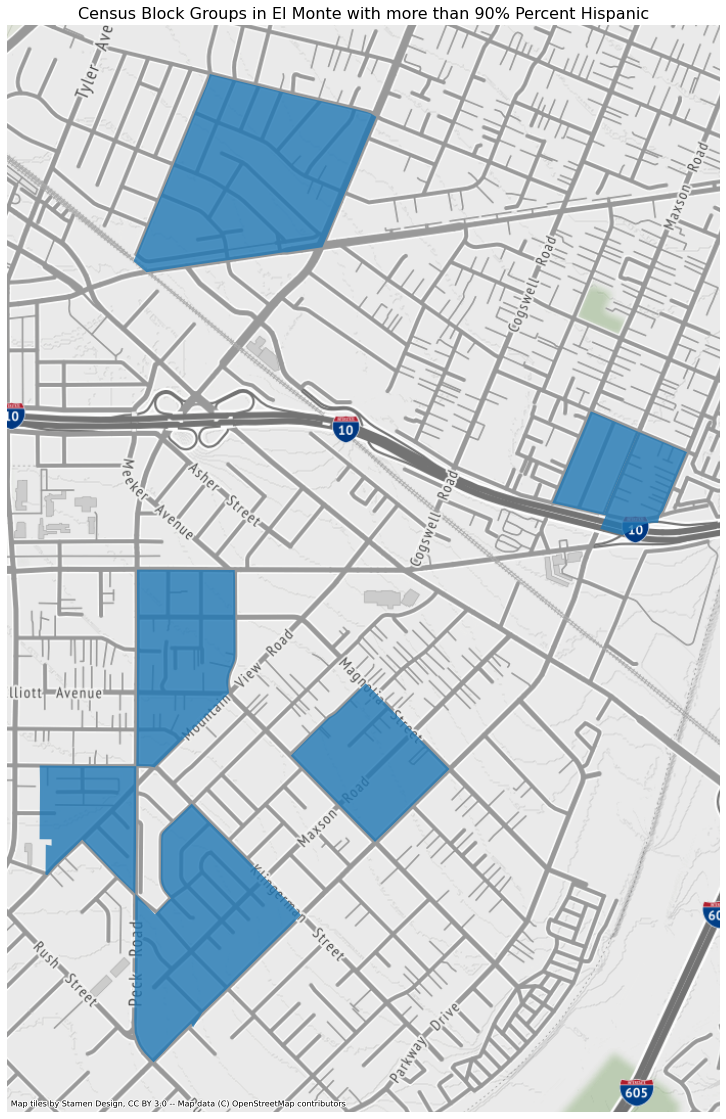

In [56]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(20, 20))

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Hispanic'] > 90].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Block Groups in El Monte with more than 90% Percent Hispanic',fontsize=16)

# add a basemap
ctx.add_basemap(ax)